In [10]:
import pandas as pd

# Read the wine quality dataset from UCI machine learning repository
wine_data =  pd.read_csv('winequality-red.csv', delimiter=';')

# Print the first 5 rows rows of the dataset
print(wine_data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [11]:
# Check for null values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
# Check for duplicates
wine_data.duplicated().sum()

240

In [13]:
# Remove duplicates
wine_data.drop_duplicates(inplace=True)

In [14]:
# Check for duplicates
wine_data.duplicated().sum()

0

In [15]:
# Apply data pre-processing

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the dataset into features and target
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression Score: 0.5919117647058824


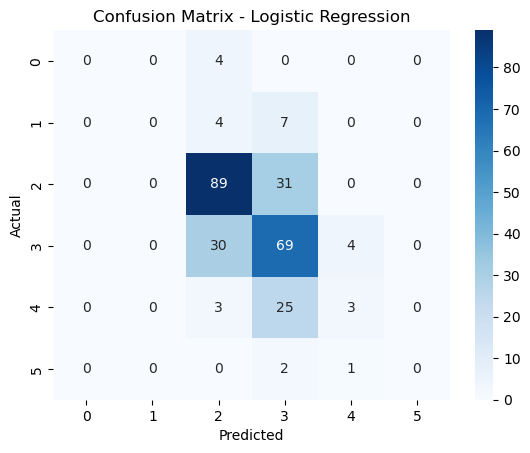

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression

#Logistic Regression

lr_model = LogisticRegression(max_iter=4000, solver='sag')
lr_model.fit(X_train, y_train)
lr_score = lr_model.score(X_test, y_test)
print("Logistic Regression Score:", lr_score)
y_pred_lr = lr_model.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_score = dt_model.score(X_test, y_test)
print("Decision Tree Score:", dt_score)
fig = plt.figure(figsize=(15,8))
plot_tree(dt_model, feature_names=X.columns, class_names=[str(i) for i in range(1, 11)], filled=True)
plt.show()

Decision Tree Score: 0.4889705882352941


InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object') instead.

<Figure size 1500x800 with 0 Axes>

Random Forest Score: 0.6470588235294118


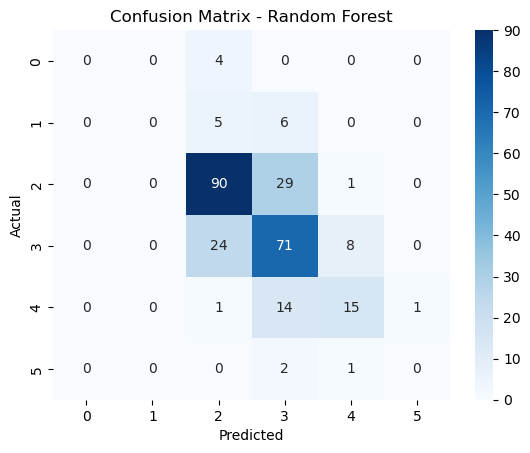

In [18]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_score = rf_model.score(X_test, y_test)
print("Random Forest Score:", rf_score)
y_pred_rf = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Step 4: Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initialize the GridSearchCV object
rf_model_cv = GridSearchCV(rf_model, param_grid, cv=3)

# Fit the GridSearchCV object to the data
rf_model_cv.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", rf_model_cv.best_params_)
print("Best Score:", rf_model_cv.best_score_)

rf_model_best = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=10, min_samples_leaf=1)
rf_model_best.fit(X_train, y_train)
rf_score_best = rf_model_best.score(X_test, y_test)
print("Random Forest Score (Before Hyperparameter Tuning):", rf_score)
print("Random Forest Score (After Hyperparameter Tuning):", rf_score_best)

In [ ]:
# Step 5: Compare the results

scores = [lr_score, dt_score, rf_score, rf_score_best]
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'RandomForest (Hyperparameter Tuning)']

sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=labels, y=scores, palette='viridis')
plt.title('Comparison of Model Scores')
plt.xlabel('Classification Model')
plt.ylabel('Accuracy Score')
for i, v in enumerate(scores):
    ax.text(i, v+0.01, str(round(v, 3)), horizontalalignment='center', color='black', fontweight='bold')
plt.show()